In [ ]:
#!conda install numpy pytorch torchvision cpuonly -c pytorch -y
#!pip install matplotlib --upgrade --quiet
#!pip install jovian --upgrade --quiet
#!conda install pandas -y
#!conda install seaborn -y

In [1]:
import torch 
import jovian
import random 
import torchvision
import matplotlib
import torch.nn as nn
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

In [2]:

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Number of rows



In [3]:
num_rows =len(df)
num_rows

299

Number of columns 

In [4]:
num_cols=len(df.columns)
num_cols

13

In [6]:
input_cols=['age','anaemia','creatinine_phosphokinase',
            'diabetes','ejection_fraction','high_blood_pressure',
             'platelets','serum_creatinine','serum_sodium','sex',
             'smoking','time']
input_cols


['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time']

In [5]:
output_cols=['DEATH_EVENT']
output_cols

['DEATH_EVENT']

Text(0.5, 1.0, 'Death Graph')

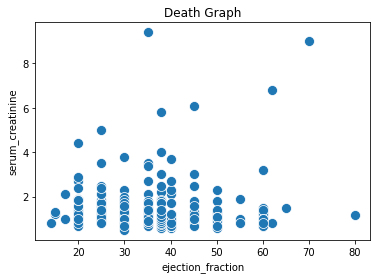

In [7]:
sns.scatterplot(df.ejection_fraction,
                df.serum_creatinine,
                s= 100);
plt.title("Death Graph")

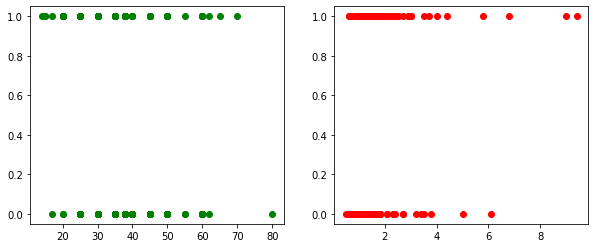

In [8]:

fig = plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
X1 = df.ejection_fraction
Y1 = df.DEATH_EVENT
plt.plot(X1, Y1, color = "green", marker = "o", linestyle = "none")

plt.subplot(1, 2, 2)
X2 = df.serum_creatinine
Y2 = df.DEATH_EVENT
plt.plot(X2, Y2, color = "red", marker = "o", linestyle = "none")


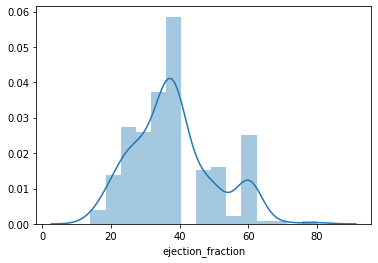

In [9]:
sns.distplot(df.ejection_fraction, kde="true");


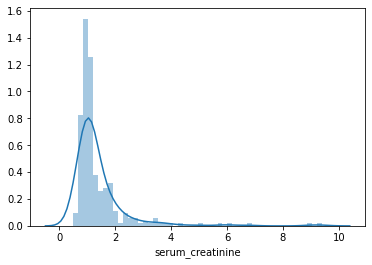

In [10]:
sns.distplot(df.serum_creatinine, kde=True);

# Prepare the dataset for training 

In [11]:
def df_to_array(dataframe):
     df1 = dataframe.copy(deep=True)
     input_array = df1[input_cols].to_numpy()
     targets_array = df1[output_cols].to_numpy()
     return input_array, targets_array

inputs_array, targets_array=df_to_array(df)

inputs_array, targets_array

(array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 1.000e+00, 0.000e+00,
         4.000e+00],
        [5.500e+01, 0.000e+00, 7.861e+03, ..., 1.000e+00, 0.000e+00,
         6.000e+00],
        [6.500e+01, 0.000e+00, 1.460e+02, ..., 1.000e+00, 1.000e+00,
         7.000e+00],
        ...,
        [4.500e+01, 0.000e+00, 2.060e+03, ..., 0.000e+00, 0.000e+00,
         2.780e+02],
        [4.500e+01, 0.000e+00, 2.413e+03, ..., 1.000e+00, 1.000e+00,
         2.800e+02],
        [5.000e+01, 0.000e+00, 1.960e+02, ..., 1.000e+00, 1.000e+00,
         2.850e+02]]),
 array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
   

In [12]:
#conversion
inputs = torch.from_numpy(inputs_array).type(torch.float32)
targets = torch.from_numpy(targets_array).type(torch.float32)

In [14]:
dataset =TensorDataset(inputs, targets)
len(dataset)

299

In [15]:
from torch.utils import data
val_percent= 0.15
val_percent
val_size = int(num_rows*val_percent)
train_size=num_rows- val_size
val_size, train_size

(44, 255)

In [16]:
train_ds, val_ds =data.random_split(dataset, (train_size, val_size))

In [17]:
batch_size = 5

In [18]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True )
val_loader = DataLoader(val_ds, batch_size)

In [19]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[7.9000e+01, 1.0000e+00, 5.5000e+01, 0.0000e+00, 5.0000e+01, 1.0000e+00,
         1.7200e+05, 1.8000e+00, 1.3300e+02, 1.0000e+00, 0.0000e+00, 7.8000e+01],
        [6.0000e+01, 1.0000e+00, 1.5600e+02, 1.0000e+00, 2.5000e+01, 1.0000e+00,
         3.1800e+05, 1.2000e+00, 1.3700e+02, 0.0000e+00, 0.0000e+00, 8.5000e+01],
        [5.3000e+01, 0.0000e+00, 5.6000e+01, 0.0000e+00, 5.0000e+01, 0.0000e+00,
         3.0800e+05, 7.0000e-01, 1.3500e+02, 1.0000e+00, 1.0000e+00, 2.3100e+02],
        [7.0000e+01, 0.0000e+00, 6.6000e+01, 1.0000e+00, 4.5000e+01, 0.0000e+00,
         2.4900e+05, 8.0000e-01, 1.3600e+02, 1.0000e+00, 1.0000e+00, 8.0000e+01],
        [6.0000e+01, 0.0000e+00, 3.9640e+03, 1.0000e+00, 6.2000e+01, 0.0000e+00,
         2.6336e+05, 6.8000e+00, 1.4600e+02, 0.0000e+00, 0.0000e+00, 4.3000e+01]])
targets: tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.]])


# Create a Model 

In [20]:
input_size= len(input_cols)
output_size= len(output_cols)
print(input_size)
print(output_size)

12
1


In [21]:
class LifeModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(input_size,6)
        self.linear2 = nn.Linear(6, 3)
        self.linear3 = nn.Linear(3,output_size)
        
    def forward(self, xb):
        out = self.linear1(xb)
        out = F.relu(out)
        out = self.linear2(out)
        out = F.relu(out)
        out = self.linear3(out)
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                 # Generate predictions
        loss = F.smooth_l1_loss(out, targets)    # Calculate loss
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                 # Generate predictions
        loss = F.smooth_l1_loss(out, targets)    # Calculate loss
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 50th epoch
        if (epoch+1) % 50 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [22]:
model = LifeModel()

#check the parameters

list(model.parameters())

[Parameter containing:
 tensor([[ 0.1247, -0.1584, -0.0526,  0.1091,  0.0461,  0.2698,  0.0343, -0.1654,
          -0.0422,  0.0966,  0.2501,  0.1012],
         [-0.0592, -0.2278,  0.0609,  0.2734, -0.1187,  0.0884, -0.1720,  0.2499,
          -0.0369, -0.2792, -0.1655, -0.0105],
         [ 0.0945,  0.1125, -0.0951, -0.2076,  0.1711,  0.2133,  0.1210, -0.1262,
          -0.0339, -0.1183, -0.0329,  0.2744],
         [-0.0045, -0.1507,  0.0366, -0.1138,  0.1606,  0.2835, -0.1161, -0.2454,
          -0.2254, -0.0241,  0.2105,  0.1420],
         [-0.0593, -0.1280, -0.0531, -0.1388,  0.0893,  0.0174, -0.1630, -0.2503,
           0.1401, -0.2017, -0.0484,  0.2204],
         [ 0.0041,  0.0851,  0.2298,  0.0366, -0.1067,  0.2273,  0.2397, -0.0473,
           0.1261,  0.1325,  0.0948,  0.1461]], requires_grad=True),
 Parameter containing:
 tensor([ 0.1591,  0.0551,  0.2138, -0.2833, -0.0534, -0.1811],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.3116, -0.0457, -0.2570,  0.05

# Train the model to fit the data

In [23]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [24]:
result=evaluate(model,val_loader)
print(result)

{'val_loss': 832.3087158203125}


In [25]:
epochs=5
lr=0.5
history1 = fit(epochs, lr , model , train_loader, val_loader)

Epoch [5], val_loss: 0.1200


In [26]:
epochs= 5
lr=0.1
history2 = fit(epochs, lr , model , train_loader, val_loader)

Epoch [5], val_loss: 0.0952


In [ ]:
epochs = 5
lr = 0.05
history3 = fit(epochs, lr , model , train_loader, val_loader)

In [ ]:
epochs = 5
lr = 0.0025
history4 = fit(epochs, lr , model , train_loader, val_loader)

In [27]:
result = evaluate(model, val_loader)
final_loss = round(result['val_loss'], 4)
final_loss

0.0952

# Single prediction 

In [28]:
def predict_single(x, model):
    xb = x.unsqueeze(0)
    return model(x).item()

In [29]:
x, target = val_ds[2]
pred = predict_single(x, model)
print("Target: ", int(target.item()))
print("Prediction:",int(pred) )

Target:  0
Prediction: 0


In [30]:
x, target = val_ds[0]
pred = predict_single(x, model)
print("Target: ", int(target.item()))
print("Prediction:",int(pred) )

Target:  0
Prediction: 0


In [31]:
x, target = val_ds[1]
pred = predict_single(x, model)
print("Target: ", int(target.item()))
print("Prediction:",int(pred) )

Target:  0
Prediction: 0


In [32]:
x, target = val_ds[3]
pred = predict_single(x, model)
print("Target: ", int(target.item()))
print("Prediction:",int(pred) )

Target:  0
Prediction: 0


In [33]:
x, target = val_ds[4]
pred = predict_single(x, model)
print("Target: ", int(target.item()))
print("Prediction:",int(pred) )

Target:  0
Prediction: 0


In [52]:
x, target = val_ds[1]
pred = predict_single(x, model)
print("Target: ", int(target.item()))
print("Prediction:",pred )

Target:  0
Prediction: 0.4103430211544037


even though the model seems to not 100% predict the death of an individual, the value loss is pretty low.